In [1]:
%reload_ext autoreload
%autoreload 2
import os
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from src.utils import load_txt, save_txt

# Load dataset

Articles with docids

In [3]:
df = pd.read_csv('../data/processed_articles.csv')

In [4]:
df.shape

(35907, 4)

In [5]:
df.head()

,docid,headline,body,website
0,64471158,Relaxed Marie Kondo Now Says She Perfectly Hap...,LOS ANGELES—Admitting that she’d made some maj...,The Onion
1,84486776,U.S. Officials Call For Correct Amount Of Viol...,WASHINGTON—Addressing the need for swift and m...,The Onion
2,36589089,Kamala Harris Asks Communications Assistant If...,WASHINGTON—In an effort to expand her professi...,The Onion
3,15387752,25 Arrested In Fake Nursing School Diploma Scheme,Federal agents have arrested 25 suspects accus...,The Onion
4,41114025,World’s Oldest American Dies At 72,"OXNARD, CA—Living longer than any citizen in t...",The Onion


In [6]:
df.isna().sum()

docid       0
headline    0
body        0
website     0
dtype: int64

In [7]:
df[df.body.str.strip() == '']

,docid,headline,body,website
1014,28393611,Terrified Pedestrian Narrowly Escapes Tesla By...,,The Onion
3578,94755577,Amber Alert Freaks Out Abducted 3-Year-Old Nap...,,The Onion
5925,65910948,Report: There Already 5 Million Players Who Ar...,,The Onion
6686,27166290,"Steve Mnuchin, Nancy Pelosi Announce Meeting T...",,The Onion


In [8]:
df[df.headline.str.strip() == '']

,docid,headline,body,website


In [9]:
df.website.value_counts()

website
The Onion                 34999
Clickhole                   829
The Every Three Weekly       79
Name: count, dtype: int64

# Basic Preprocessing

Basic cleaning:

In [10]:
for col in ["headline", "body"]:
    df[col] = df[col].map(lambda x: " ".join(x.split()))  # remove extra spaces
    df[col] = df[col].str.replace("\n", " ").str.replace("\r", " ")\
        .str.replace("’", "'").str.replace("‘", "'")\
        .str.replace("“", '"').str.replace("”", '"')\
        .str.replace("–", "-").str.replace("…", "...")\
        .str.replace("•", "*").str.replace("●", "*").str.replace("·", "*")

Drop null values:

In [11]:
df = df[df.body.str.strip() != '']
len(df)

35903

Identify duplicated articles:

In [12]:
df[['headline', 'body']].apply(lambda x: x.str.lower()).duplicated().sum()

611

In [13]:
dup_idx = df[['headline', 'body']].apply(lambda x: x.str.lower()).duplicated(keep=False)
df[dup_idx].sort_values(["website", "headline"])

,docid,headline,body,website
35798,79401944,"'Trust Us, You Don't Want Our Plan B': GOP Law...",With two sexual assault allegations out agains...,Clickhole
35805,16171433,"'Trust Us, You Don't Want Our Plan B': GOP Law...",With two sexual assault allegations out agains...,Clickhole
35036,21989076,'We Have A Plan': The Pentagon Has Just Announ...,"From terrorism, to cyber attacks, to global wa...",Clickhole
35044,75005169,'We Have A Plan': The Pentagon Has Just Announ...,"From terrorism, to cyber attacks, to global wa...",Clickhole
35303,48499481,"5 Episodes Of 'Diners, Drive-Ins And Dives' Wh...",Guy Fieri has long been turning foodies on to ...,Clickhole
...,...,...,...,...
34134,53590621,"world health organization: 'not sure how, but ...",GENEVA—Amid the spread of the deadly Middle Ea...,The Onion
34096,50431611,world's luminaries crowd around 'time' 100 lis...,"NEW YORK—Their hearts pounding, the world's le...",The Onion
34138,72577521,world's marine life on edge now that seaworld ...,PACIFIC OCEAN—Following the theme park's pledg...,The Onion
34784,25076746,world's oldest woman just pleased every other ...,"OSAKA, JAPAN—Reflecting on a long life that be...",The Onion


In [14]:
dup_idx = df[['headline', 'body']].apply(lambda x: x.str.lower()).duplicated()
df = df[~dup_idx]

In [15]:
len(df)

35292

In [16]:
df.website.value_counts()

website
The Onion                 34470
Clickhole                   743
The Every Three Weekly       79
Name: count, dtype: int64

In [17]:
df.to_csv('../data/processed_articles_dedup.csv', index=False)

Load:

In [18]:
docs_df = pd.read_csv('../data/processed_articles_dedup.csv')
len(docs_df)

35292

In [19]:
docs_df.body.isna().sum()

0

In [20]:
docs_df.website.value_counts()

website
The Onion                 34470
Clickhole                   743
The Every Three Weekly       79
Name: count, dtype: int64

# Stopwords

In [ ]:
# Stopwords provided in HW2
stopwords_hw = set(load_txt('../data/stopwords.txt'))
len(stopwords_hw)

543

In [ ]:
# SpaCy stopwords: https://spacy.io/usage/linguistic-features#stop-words
from spacy.lang.en.stop_words import STOP_WORDS

spacy_stopwords = set(STOP_WORDS)
len(spacy_stopwords)

326

In [16]:
# Additional stopwords from SpaCy that are not in the HW2 list
potential_stopwords = spacy_stopwords.difference(stopwords_hw)
len(potential_stopwords)

50

In [17]:
print(potential_stopwords)

{'top', 'full', '’ll', '’s', 'twenty', 'back', 'due', 'n’t', "'ve", "'re", 'sixty', "n't", "'d", 'ten', "'ll", 'bottom', 'empty', 'amount', '‘s', '‘ve', 'twelve', '‘d', 'give', '‘ll', 'n‘t', 'fifteen', 'make', "'m", 'hundred', 'eleven', 'mine', 'i', 'part', '‘m', 'made', 'show', 'move', 'side', 'forty', '’d', '’re', 'fifty', 'put', 'call', '’m', "'s", '’ve', 'front', 'ca', '‘re'}


In [18]:
# Update the stopwords list
stopwords = stopwords_hw.union({
    "n't", "'m", "'ve", "'re", '’m', '‘s', '’d', '‘re', '‘d', '’ve', '‘m', '‘ve', 'n‘t', '’ll', "'s",
    "'ll", '‘ll', 'n’t', '’re', '’s', 'i', "'d",  
    "nt", "m", "ve", "re", 's', 'd', 'll', 'i', "u",
    "doesn", "didn", "don", "hadn", "hasn", "haven", "isn", "shouldn", "wasn", "weren", "won", "wouldn",
})
len(stopwords)

584

In [19]:
# Exclude some stopwords -- this is highly subjective
remove_stopwords = {
    "allow", "allows", "alone", "always", "appear", "appreciate", "appropriate", 
    "associated", "available", "awfully",
    "best", "better", "brief", 
    "changes", "currently",
    "different",
    "example", 
    "far", "first",
    "ignored", "immediate",
    "last", "least",
    "more", "most",
    "near", "necessary", "new", 
    "sensible", "sent", "serious", "sorry",
    "together", 
    "useful", 
}
for word in remove_stopwords:
    if word in stopwords:
        stopwords.remove(word)

In [20]:
len(stopwords)

550

Save updated stopwords list:

In [21]:
save_txt(sorted(stopwords), '../data/stopwords_updated.txt')

Load stopwords:

In [21]:
stopwords = set(load_txt('../data/stopwords_updated.txt'))
len(stopwords)

550

# Word Cloud

In [19]:
from itertools import chain

full_text = " ".join(df.body.str.lower().tolist())
len(full_text)

23493070

In [20]:
# Word cloud for the most common words in the articles
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=600, background_color ='white', 
                      regexp="\w[\w']+", stopwords=stopwords, min_font_size=10)

wordcloud.generate(full_text)

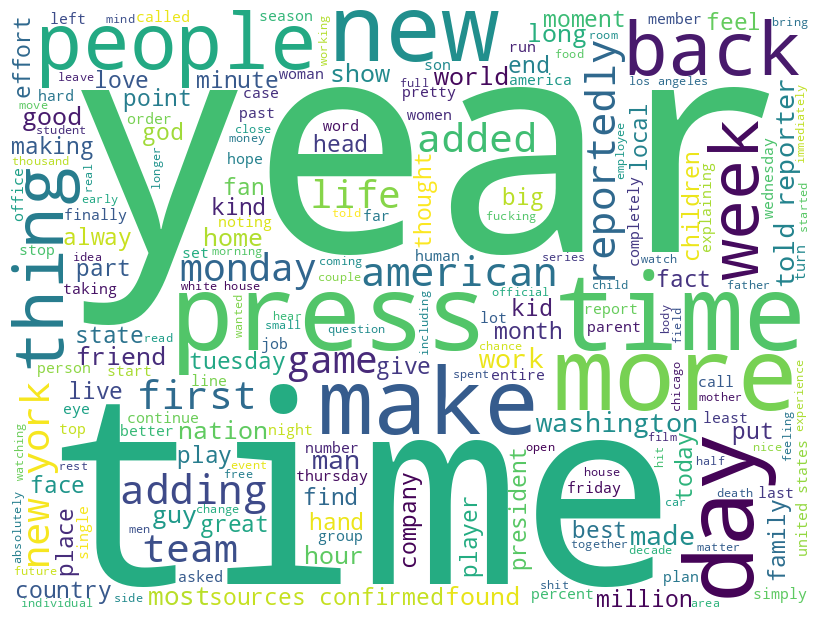

In [21]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [22]:
save_txt(wordcloud.words_, '../data/wordcloud.txt')

# Document Preprocessing

In [22]:
from src.document_preprocessor import RegexTokenizer

In [23]:
example = "ANN ARBOR, MI—well-known day-to-day's O'Brien's cat O'Neill, Garc'a. It's don't isn't they're they've they'll they'd!"

# default NLTK regex
print(RegexTokenizer("\w+").tokenize(example)) 
# problem: hyphenated words are split
# problem: words with apostrophes (e.g. names) are split

# default WordCloud regex for tokenization
# doesn't split words with apostrophes, doesn't handle single letter words
print(RegexTokenizer("\w[\w']+").tokenize(example))  
# same as above but also handles single letter words
print(RegexTokenizer("\w[\w']*").tokenize(example))  
# problem: possessive forms must be reduced to their base form
# problem: hyphenated words are split

# custom regex
# doesn't split hyphenated words
# splits words with apostrophes that are contractions or possessives, 
#   but doesn't split other words with apostrophes
print(RegexTokenizer(r"\w+(?:-\w+)*(?:'[^stmrvld]\w*)*").tokenize(example))  # 's|'t|'m|'re|'ve|'ll|'d

['ann', 'arbor', 'mi', 'well', 'known', 'day', 'to', 'day', 's', 'o', 'brien', 's', 'cat', 'o', 'neill', 'garc', 'a', 'it', 's', 'don', 't', 'isn', 't', 'they', 're', 'they', 've', 'they', 'll', 'they', 'd']
['ann', 'arbor', 'mi', 'well', 'known', 'day', 'to', "day's", "o'brien's", 'cat', "o'neill", "garc'a", "it's", "don't", "isn't", "they're", "they've", "they'll", "they'd"]
['ann', 'arbor', 'mi', 'well', 'known', 'day', 'to', "day's", "o'brien's", 'cat', "o'neill", "garc'a", "it's", "don't", "isn't", "they're", "they've", "they'll", "they'd"]
['ann', 'arbor', 'mi', 'well-known', 'day-to-day', 's', "o'brien", 's', 'cat', "o'neill", "garc'a", 'it', 's', 'don', 't', 'isn', 't', 'they', 're', 'they', 've', 'they', 'll', 'they', 'd']


Choosing the last one:

In [24]:
from src.document_preprocessor import RegexTokenizer

preprocessor = RegexTokenizer("\w+(?:-\w+)*(?:'[^stmrvld]\w*)*", lowercase=True)

In [25]:
preprocessor.tokenize("LOS ANGELES—Apologizing for")

['los', 'angeles', 'apologizing', 'for']

# Indexing

In [26]:
from src.indexing import Indexer, IndexType

In [29]:
index = Indexer.create_index(
    index_type=IndexType.BasicInvertedIndex, 
    dataset_path="../data/processed_articles_dedup.csv",
    document_preprocessor=preprocessor, 
    stopwords=stopwords,
    minimum_word_frequency=1,
    text_key="body",
    id_key="docid",
)

35292it [00:08, 4046.88it/s]


In [30]:
os.makedirs("output", exist_ok=True)
index.save("output/index_v1")

Load:

In [27]:
from src.indexing import BasicInvertedIndex

index = BasicInvertedIndex()
index.load("output/index_v1")

In [28]:
len(index.vocabulary)

92659

In [29]:
len(index.get_postings("arbor"))

59

In [30]:
for docid, count in index.get_postings("arbor"):
    print(f"[{docid}] {index.get_doc_text(docid)[:100]}...")

[25936428] ANN ARBOR, MI—Wanting to provide his wife with the support she needed during this time, father-to-be...
[65800417] ANN ARBOR, MI—Following a comprehensive, decade-long survey conducted by human mobility researchers ...
[93074214] ANN ARBOR, MI—Amid a growing body of research that suggests few Americans ever complete a compelling...
[51926637] ANN ARBOR, MI—Blasting the move as a "total breach of the public's trust," Domino's came under fire ...
[48449797] CORVALLIS, OR—Pointing out the absolute waste of money on display, Halloween party sources told repo...
[66290531] ANN ARBOR, MI—With a twinkle of seasonal cheer in her eyes as she informs well-wishers of her estran...
[61658164] ROCHESTER, NY—Already feeling singled out by being the only one in class with leaves, branches, and ...
[58206107] ANN ARBOR, MI—Admitting that the shifty fish has managed to evade detection by mankind for thousands...
[36897653] ANN ARBOR, MI—Having determined through empirical research that child

# BM25 Ranker

- Get the top 50 documents per query ranked using BM25.
- This will be used to create the dataset that will later be manually annotated with relevance judgements.

In [31]:
from src.ranker import BM25, Ranker

bm25_scorer = BM25(index)  # BM25 scorer with default parameters
bm25_ranker = Ranker(index, preprocessor, stopwords, bm25_scorer, score_top_k=50)

# Synthetic queries

- Generated using a Doc2Query model.
- One query for each of 60 randomly sampled articles.
- Many of the synthetically generated queries seemed to be too specific to the document that it was generated from.
- So I manually reviewed them and created 2 new columns:
  - `keep` (boolean): True if we can add this query-document pair to our relevance dataset.
  - `modified_query` (str): Manually created based on `generated_query` and the article content; this will be the query we will use.

In [32]:
d2q_df = pd.read_csv("../data/sampled_articles_with_queries_reviewed.csv")

d2q_df = d2q_df.query("keep == True").dropna().reset_index(drop=True)\
    .rename(columns={"modified_query": "query"})[["docid", "query"]]\
    .merge(docs_df[["docid", "headline", "body"]], on="docid", how="left")[["query", "docid", "headline", "body"]]

d2q_df

,query,docid,headline,body
0,what did bill cosby do,61253138,"NBC, Netflix Cancel Bill Cosby's Return To TV ...",After decades-old allegations resurfaced and m...
1,what makes humans better than others,70835954,5 Mindfulness Exercises You Can Use To Remind ...,"When life is busy and hectic, it can be easy t..."
2,what do office workers think,34374619,Poll: 81% Of Office Workers Would Rather Stay ...,"BATON ROUGE, LA—More than four out of five emp..."
3,when did mitt romney cry,80234531,Romney Spends Day Tearfully Apologizing At Fat...,"BRIGHTON, MI—Visitors to Brighton's Fairview C..."
4,what is the satirical article on recycling,15119132,Dept. Of Sanitation Asks Public To Separate Pe...,WASHINGTON—Nearly 20 years after launching its...
5,what is the DNC shakeup?,37865952,Tulsi Gabbard Named Democratic Nominee After D...,We have the latest on this massive shakeup at ...
6,white nationalism and supremacy in america,32659725,White Nationalist Movement: Myth Vs. Fact,"Over the past few years, the white nationalist..."
7,experiences in the service industry,24116079,Day Job Officially Becomes Job,"HILLSBORO, OR—Another human dream was crushed ..."
8,how to deal with an emotional friend,81203423,Man Pinned Under Blankets For Three Days,"MOLINE, TX—Crushed under the weight of a sudde..."
9,what did the downy duck do,96822073,Historical Archives: A Most Amusing Duck Delay...,"In the Port of Boston, the Matter of deliverin..."


In [33]:
d2q_df.shape[0]

28

In [52]:
sorted(d2q_df["query"].tolist())

['Hollywood celebrity scandals',
 'NFL news and updates',
 'do aliens exist',
 'experiences in the service industry',
 'how to deal with an emotional friend',
 'how to lose weight',
 'urban myths and legends',
 'what are some relationship red flags',
 'what article said bees are ambassadors',
 'what did bill cosby do',
 'what did reporters say on Fox News',
 'what did the downy duck do',
 'what did the woman say to her friend?',
 'what do office workers think',
 'what do people think of the two-party system?',
 'what happened during the halftime show at the Super Bowl?',
 'what happened in Yellowstone National Park?',
 'what happened when world leaders met?',
 'what is the DNC shakeup?',
 'what is the role of the creative director',
 'what is the satirical article on recycling',
 'what makes humans better than others',
 'when did mitt romney cry',
 'white nationalism and supremacy in america',
 'who are the United States Supreme Court justices',
 'why are US national parks closed',
 'w

In [35]:
d2q_bm25_df = []

for _, q in d2q_df.iterrows():
    results = bm25_ranker.query(q["query"])
    
    src_doc_retrieved = False
    for docid, score in results:
        d2q_bm25_df.append({"query": q["query"], "docid": docid})
        if docid == q["docid"]:
            src_doc_retrieved = True
    
    if not src_doc_retrieved:
        d2q_bm25_df.append({"query": q["query"], "docid": q["docid"]})
        
d2q_bm25_df = pd.DataFrame(d2q_bm25_df)\
    .merge(docs_df[["docid", "headline", "body"]], on="docid", how="left")[["query", "docid", "headline", "body"]]

d2q_bm25_df

,query,docid,headline,body
0,what did bill cosby do,87589070,Bill Cosby Convicted Of Sexual Assault,Bill Cosby has been convicted of drugging and ...
1,what did bill cosby do,91206412,Bill Cosby's Sexual Assault Conviction Overturned,Bill Cosby's sexual assault conviction has bee...
2,what did bill cosby do,95988481,California Ends Statute Of Limitations On Sex ...,In the wake of the many allegations against Bi...
3,what did bill cosby do,71188982,Cosby Lawyer Asks Why Accusers Didn't Come For...,LOS ANGELES—Responding to recent allegations t...
4,what did bill cosby do,61253138,"NBC, Netflix Cancel Bill Cosby's Return To TV ...",After decades-old allegations resurfaced and m...
...,...,...,...,...
1411,what are some relationship red flags,57326447,Twin Absorbs Sibling At 62,"GARY, IN—Confirming the results after extensiv..."
1412,what are some relationship red flags,44345989,"Study Finds Link Between Loneliness, Being Stu...",BALTIMORE—In landmark research into what may b...
1413,what are some relationship red flags,95168200,BTK Ready To Start Dating Again,"EL DORADO, KS—Saying he'd had time to work thr..."
1414,what are some relationship red flags,68236181,7 Modern Dating Rules That Don't Mean Shit In ...,"Modern dating can be complicated, but there ar..."


In [36]:
d2q_bm25_df["query"].nunique()

28

In [37]:
d2q_bm25_df.to_csv("../data/d2q_queries_bm25_results.csv", index=False, encoding='utf-8-sig')

# Manual queries

- Think of common queries that users are likely to search for.
- Minimize overlap with the reviewed D2Q queries.
- We decided to include 60 unique queries in our dataset, so we need 32 more.

In [38]:
manual_queries = sorted([
    "what are some interesting conspiracy theories",
    "what did area/local man do this time",
    "what the dog doing",
    "is AI taking over the world",
    "how to get a job",
    "how to make money",
    "what were people doing during the covid-19 pandemic",
    "life as a college student",
    "fun date ideas for couples",
    "how to make friends",
    "how to be happy :(",
    "University of Michigan campus news",
    "latest news from Ann Arbor and Washtenaw County",
    "local sports teams updates",
    "popular social media trends",
    "kitchen fails and cooking disasters",   
    "how to fight the winter blues",
    "therapy sessions gone wrong",
    "how to get over a breakup",
    "how to be more productive",
    "is the economy going to crash",
    "what movies and TV shows should I avoid",
    "what sports should I try",
    "how to get a good night's sleep",
    "why do people like pineapple on pizza",
    "cool science facts",
    "why should I care about climate change",
    "I'm bored I need a new hobby",
    "what did politicians say about voter fraud",
    "millenials vs boomers",
    "what's going on in Florida",
    "lie to me",
    "what's something you shouldn't joke about",
    "funny podcasts and radio shows",
    "New York subway stories",
    "people being dumb on the internet",
    "I hate my boss what should I do",
    "how to scam people",
    "social anxiety tips",
    "uncomfortable conversations with parents",
    "getting along with your siblings",
    "West Coast vs East Coast",
])
len(manual_queries)

42

In [51]:
manual_queries

['I hate my boss what should I do',
 "I'm bored I need a new hobby",
 'New York subway stories',
 'University of Michigan campus news',
 'West Coast vs East Coast',
 'cool science facts',
 'fun date ideas for couples',
 'funny podcasts and radio shows',
 'getting along with your siblings',
 'how to be happy :(',
 'how to be more productive',
 'how to fight the winter blues',
 "how to get a good night's sleep",
 'how to get a job',
 'how to get over a breakup',
 'how to make friends',
 'how to make money',
 'how to scam people',
 'is AI taking over the world',
 'is the economy going to crash',
 'kitchen fails and cooking disasters',
 'latest news from Ann Arbor and Washtenaw County',
 'lie to me',
 'life as a college student',
 'local sports teams updates',
 'millenials vs boomers',
 'people being dumb on the internet',
 'popular social media trends',
 'social anxiety tips',
 'therapy sessions gone wrong',
 'uncomfortable conversations with parents',
 'what are some interesting conspira

In [39]:
manual_bm25_df = []
for query in manual_queries:
    results = bm25_ranker.query(query)
    for docid, score in results:
        manual_bm25_df.append({"query": query, "docid": docid})
        
manual_bm25_df = pd.DataFrame(manual_bm25_df)\
    .merge(docs_df[["docid", "headline", "body"]], on="docid", how="left")
    
manual_bm25_df

,query,docid,headline,body
0,I hate my boss what should I do,20834444,Epic Clapback: Ariana Grande Has Responded To ...,It seems like internet trolls are becoming mor...
1,I hate my boss what should I do,95538996,Iranian Scientist Annoyed He Has To Go Back To...,"ISFAHAN, IRAN—In the wake of President Trump's..."
2,I hate my boss what should I do,59451106,Things New Yorkers Hate Most About L.A.,"Let's face it, you're not a real New Yorker un..."
3,I hate my boss what should I do,75126704,Things People Hate The Most About Public Trans...,"It's disgusting to imagine, but Americans take..."
4,I hate my boss what should I do,58264476,Special Orders Chefs Hate The Most And Why,Unless you want the staff spitting in your foo...
...,...,...,...,...
2045,why should I care about climate change,25475335,Parenting Win! The NBA Is Attaching Diaper Cha...,Working parents know all too well how hard it ...
2046,why should I care about climate change,51928223,Good For Him: Yo-Yo Ma Has Announced He Is Goi...,"When you go to see live classical music, you c..."
2047,why should I care about climate change,25643415,Inspiring: 4 Sex-Positive Drawings Of Big Bird...,"In today's hyper-polarized political climate, ..."
2048,why should I care about climate change,66704209,So Sexy! These 6 Frogs Don't Even Have To Be P...,The average frog isn't nearly hot enough for u...


In [40]:
manual_bm25_df["query"].nunique()

42

In [41]:
manual_bm25_df.to_csv("../data/manual_queries_bm25_results.csv", index=False, encoding='utf-8-sig')

# Full dataset to annotate

In [42]:
d2q_bm25_df["query_source"] = "doc2query_reviewed"
manual_bm25_df["query_source"] = "manual"
rel_df = pd.concat([d2q_bm25_df, manual_bm25_df], ignore_index=True)
rel_df["rel"] = None

In [43]:
rel_df.shape

(3466, 6)

In [44]:
rel_df["query"].nunique()

70

In [45]:
rel_df = rel_df.groupby("query")\
    .apply(lambda x: x.sample(frac=1, random_state=42))\
    .reset_index(drop=True)
rel_df.head()

,query,docid,headline,body,query_source,rel
0,Hollywood celebrity scandals,60027607,'Elvis' Producers Criticized For Casting Austi...,LOS ANGELES—As awards season arrives and criti...,doc2query_reviewed,None
1,Hollywood celebrity scandals,18456146,Laura Dern And T. Rex Reexamine 68-Million-Yea...,LOS ANGELES—Reflecting on the relationship por...,doc2query_reviewed,None
2,Hollywood celebrity scandals,53018595,Ticketmaster To Require Purchase Of Round-Trip...,"WEST HOLLYWOOD, CA—Updating the company's term...",doc2query_reviewed,None
3,Hollywood celebrity scandals,38925781,Hollywood Tour Group Stops At Jack Nicholson's...,LOS ANGELES—Offering a rare glimpse of how the...,doc2query_reviewed,None
4,Hollywood celebrity scandals,36434289,6 Arrested For Changing Hollywood Sign To Read...,Six people have been arrested for altering the...,doc2query_reviewed,None


In [46]:
rel_df.groupby("query").size().value_counts()

50    52
51    16
37     1
13     1
Name: count, dtype: int64

In [47]:
all_queries = rel_df["query"].unique()

np.random.seed(42)
np.random.shuffle(all_queries)
queries_1 = all_queries[:len(all_queries)//2]
queries_2 = all_queries[len(all_queries)//2:]

rel_df1 = rel_df[rel_df["query"].isin(queries_1)].reset_index(drop=True)
rel_df2 = rel_df[rel_df["query"].isin(queries_2)].reset_index(drop=True)
len(rel_df1), len(rel_df2)

(1708, 1758)

In [48]:
rel_df1["query"].nunique(), rel_df2["query"].nunique()

(35, 35)

In [49]:
rel_df1.to_csv("../data/relevance_anusha.csv", index=False, encoding='utf-8-sig')
rel_df2.to_csv("../data/relevance_aryan.csv", index=False, encoding='utf-8-sig')

# Relevance scores

Manually annotated

In [61]:
rel_df1 = pd.read_csv("../data/relevance_anusha.csv")
rel_df2 = pd.read_csv("../data/relevance_aryan_scored.csv")

rel_df = pd.concat([rel_df1, rel_df2], ignore_index=True)\
    .dropna(subset=["rel"]).reset_index(drop=True)
rel_df["rel"] = rel_df["rel"].astype(int)

In [76]:
len(rel_df)

3162

In [ ]:
delete_queries = [
    "experiences in the service industry",
    "how to fight the winter blues",
    "lie to me",
    "what is the role of the creative director",
    "what movies and TV shows should I avoid",
    "what do office workers think",
]

rel_df = rel_df[~rel_df["query"].isin(delete_queries)].reset_index(drop=True)
rel_df["query"].nunique()

64

In [63]:
# Relevance labels distribution
rel_df["rel"].value_counts()

rel
1    1639
2     619
4     417
5     290
3     197
Name: count, dtype: int64

In [65]:
sns.set_style("darkgrid")

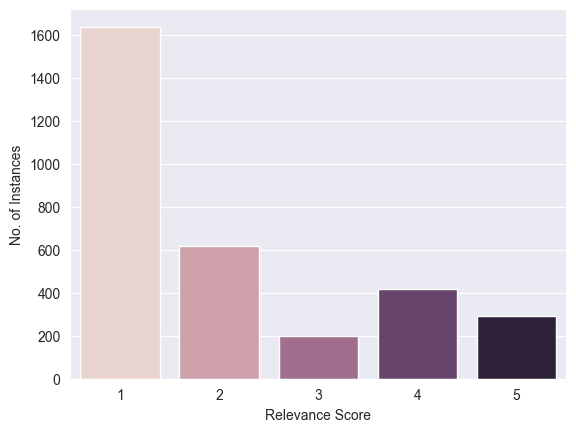

In [ ]:
sns.countplot(x="rel", data=rel_df, hue="rel")
plt.xlabel("Relevance Score")
plt.ylabel("No. of Instances")
# plt.title("Relevance Labels Distribution")
plt.legend([],[], frameon=False)
plt.show()


In [67]:
rel_df.to_csv("../data/relevance_dataset.csv", index=False, encoding='utf-8-sig')

# Train-dev-test split

In [68]:
from sklearn.model_selection import train_test_split

# train, dev, test = 60%, 20%, 20%

train_queries, test_queries = train_test_split(rel_df["query"].unique(), test_size=0.4, random_state=42)
dev_queries, test_queries = train_test_split(test_queries, test_size=0.5, random_state=42)

print(len(train_queries), len(dev_queries), len(test_queries))

38 13 13


In [69]:
print("Train queries:", train_queries)
print("Dev queries:", dev_queries)
print("Test queries:", test_queries)

Train queries: ['is AI taking over the world'
 'what were people doing during the covid-19 pandemic'
 'NFL news and updates' "I'm bored I need a new hobby"
 'who are the United States Supreme Court justices'
 'why are US national parks closed' 'therapy sessions gone wrong'
 'when did mitt romney cry' 'what the dog doing'
 'what is the satirical article on recycling'
 'uncomfortable conversations with parents' 'local sports teams updates'
 'West Coast vs East Coast' "what's something you shouldn't joke about"
 'people being dumb on the internet' "how to get a good night's sleep"
 'I hate my boss what should I do'
 'latest news from Ann Arbor and Washtenaw County'
 'what did area/local man do this time' 'New York subway stories'
 'what did the downy duck do' 'University of Michigan campus news'
 'why was justin bieber in the news' 'how to make friends'
 'how to be more productive'
 'what happened during the halftime show at the Super Bowl?'
 'what is the DNC shakeup?' 'is the economy goi

In [70]:
train_df = rel_df[rel_df["query"].isin(train_queries)].reset_index(drop=True)
dev_df = rel_df[rel_df["query"].isin(dev_queries)].reset_index(drop=True)
test_df = rel_df[rel_df["query"].isin(test_queries)].reset_index(drop=True)

len(train_df), len(dev_df), len(test_df)

(1907, 601, 654)

In [71]:
train_df.to_csv("../data/relevance_train.csv", index=False, encoding='utf-8-sig')
dev_df.to_csv("../data/relevance_dev.csv", index=False, encoding='utf-8-sig')
test_df.to_csv("../data/relevance_test.csv", index=False, encoding='utf-8-sig')